In [1]:
cd ../..

C:\Users\user\Documents\dton-wildfires-cleaner


In [2]:
from pprint import pprint
from datetime import timedelta

from sentinelhub import SHConfig
from sentinelhub.time_utils import iso_to_datetime
import matplotlib.pyplot as plt

from wildfires_processing import process_wildfire_event, process_wildfire_event_effis
from settings import wildfires_settings, sentinel_2_visualization_settings_wildfires, wildfires_settings_effis
from queries import wildfires_query
from processing.fetching_utils import get_effis_burnt_areas, get_effis_active_fires
from processing.date_utils import get_exact_date, start_of_day, end_of_day
from processing.bbox_utils import create_bbox

from utils import get_env_var, generate_EOB_url_sentinel2
from event_registry_utils import EventRegistry

In [3]:
INSTANCE_ID_WILDFIRES = get_env_var("INSTANCE_ID_WILDFIRES")
EVENT_REGISTRY_API_KEY = get_env_var("EVENT_REGISTRY_API_KEY")
CLIENT_ID = get_env_var("CLIENT_ID")
CLIENT_SECRET = get_env_var("CLIENT_SECRET")

config = SHConfig()
config.sh_client_id = CLIENT_ID
config.sh_client_secret = CLIENT_SECRET
config.instance_id = INSTANCE_ID_WILDFIRES

In [4]:
event_registry = EventRegistry(EVENT_REGISTRY_API_KEY, use_cache=True)

event_id = "eng-6719718"

event = event_registry.get_event(event_id)

In [5]:
#lat, lng, zoom, date, visualization_dates = process_wildfire_event(event, wildfires_settings, sentinel_2_visualization_settings_wildfires, config, verbose=True)

In [6]:
bbox_dimension = wildfires_settings["bbox_dimension"]
viirs_resolution = 50
timerange_before = wildfires_settings["timerange_before"]

lat = event["lat"]
lng = event["lng"]
bbox = create_bbox(lat, lng, bbox_dimension)

width = height = int(bbox_dimension / viirs_resolution)

to_time = end_of_day(iso_to_datetime(event["date"]))
from_time = iso_to_datetime(event["date"])
from_time = start_of_day(from_time - timedelta(days=timerange_before))

In [7]:
#image = get_effis_burnt_areas(bbox,from_time.isoformat(),to_time.isoformat(),width, height)
#plt.imshow(image)

In [8]:
#image = get_effis_active_fires(bbox,from_time.isoformat(),to_time.isoformat(),100, 100,useModis=True)
#plt.imshow(image)

In [9]:
#image = get_effis_active_fires(bbox,from_time.isoformat(),to_time.isoformat(),width, height,useModis=False)
#plt.imshow(image)

Getting exact date ...
2021-03-20 00:00:00 2021-03-20 23:59:59.999999
Score: 1.2112968390400622
----------------------------------------
2021-03-21 00:00:00 2021-03-21 23:59:59.999999
Score: 0.4379541736587954
----------------------------------------
2021-03-22 00:00:00 2021-03-22 23:59:59.999999
Score: 1.2908342090666387
----------------------------------------
2021-03-23 00:00:00 2021-03-23 23:59:59.999999
Score: 2.3800876767240666
----------------------------------------
2021-03-24 00:00:00 2021-03-24 23:59:59.999999
Score: 1.3134749054264128
----------------------------------------
2021-03-25 00:00:00 2021-03-25 23:59:59.999999
Score: 1.1574334084414768
----------------------------------------
2021-03-26 00:00:00 2021-03-26 23:59:59.999999
Score: 0.5655615893932338
----------------------------------------
2021-03-27 00:00:00 2021-03-27 23:59:59.999999
Score: 0.9438638696905427
----------------------------------------
2021-03-28 00:00:00 2021-03-28 23:59:59.999999
Score: 0.0
-------

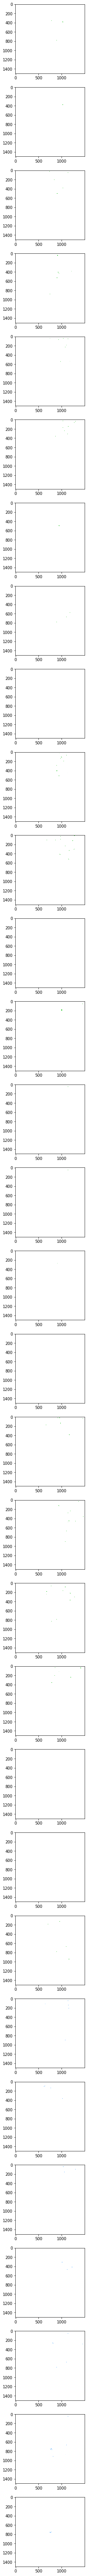

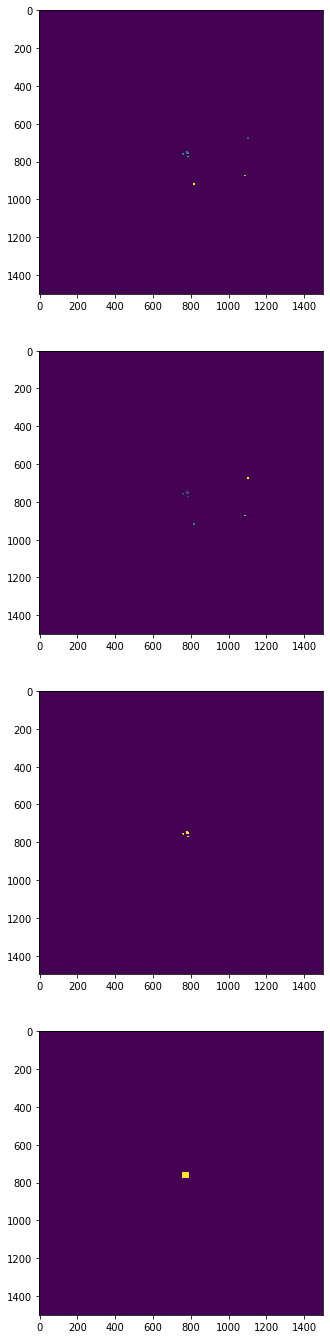

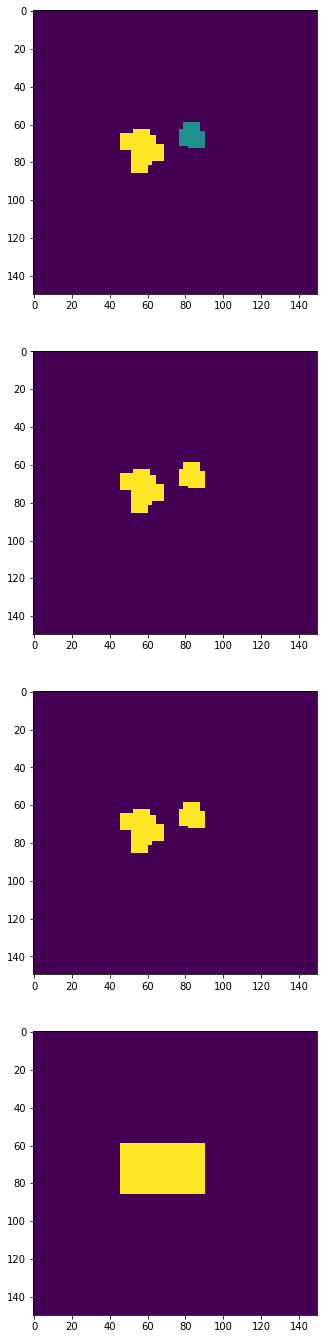

In [10]:
lat, lng, zoom, date, visualization_dates = process_wildfire_event_effis\
(event, wildfires_settings_effis, sentinel_2_visualization_settings_wildfires, config, verbose=True)

In [11]:
print(generate_EOB_url_sentinel2(lat,lng,zoom,visualization_dates["AWS_S2L1C"]["after"],visualization_dates["AWS_S2L1C"]["after"]))

https://apps.sentinel-hub.com/eo-browser/?zoom=14&lat=-33.94998249632642&lng=18.440267993954933&fromTime=2021-04-18T00%3A00%3A00.000Z&toTime=2021-04-18T23%3A59%3A59.999Z&datasetId=S2L1C


In [12]:
pprint(visualization_dates)

{'AWS_S2L1C': {'after': '2021-04-18', 'before': '2021-03-21'},
 'AWS_S2L2A': {'after': '2021-04-18', 'before': '2021-03-21'},
 'EFFIS_VIIRS_FIRES': {'after': '2021-04-18', 'before': '2021-04-18'}}
